In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [77]:
file = pd.read_csv('clean_newauthors.csv')

In [78]:
Y_FC = pd.Series.to_frame(file['FC'])
Y_RT = pd.Series.to_frame(file['RT'])

X = file
X.drop('FC',axis=1,inplace=True)
X.drop('RT',axis=1,inplace=True)
X.drop('Unnamed: 0',axis=1,inplace=True)

KeyboardInterrupt: 

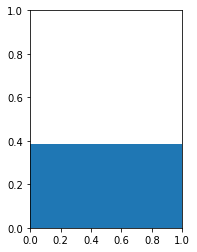

In [67]:
# FC Histogram

plt.subplot(1,2,1)
plt.hist(x=Y_FC['FC'],density=1, bins=int(np.max(Y_FC['FC']))) 
plt.xlabel('Number of FC classes')
plt.ylabel('Frequency')
plt.xlim(0, 35)

# RT Histogram
plt.subplot(1,2,2)
plt.hist(x=Y_RT['RT'],density=1, bins=int(np.max(Y_RT['RT']))) 
plt.xlabel('Number of RT classes')
plt.ylabel('Frequency')
plt.xlim(0, 12.5)

In [5]:
def gini(x):
    # (Warning: This is a concise implementation, but it is O(n**2)
    # in time and memory, where n = len(x).  *Don't* pass in huge
    # samples!)

    # Mean absolute difference
    mad = np.abs(np.subtract.outer(x, x)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(x)
    # Gini coefficient
    g = 0.5 * rmad
    return g

In [6]:
numvar = len(X.columns)
ginis = np.zeros(numvar)
for j in range(numvar):
    colname = X.columns[j]
    cont = X[colname]
    ginis[j] = gini(cont)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


(0, 20)

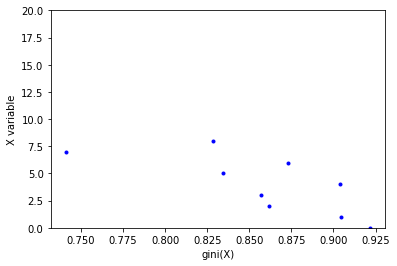

In [7]:
plt.plot(ginis,range(numvar),'b.')
plt.ylabel('X variable')
plt.xlabel('gini(X)')
plt.ylim(0,numvar)
##ordena per gini de mes gran a mes petit, aleshores al eix de les y estan les variables de mes gini a menys gini 
## i al eix de les x esta el valor de gini.

In [8]:
pos = []
for i in range(numvar):
    if (ginis[i] > 0):
        pos.append(i)
print(pos) #nomes les 9 primeres variables son representatives

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [5]:
#ens quedem amb les 9 primeres variables i eliminem la resta
X = X[['RT_l10','sd_RT','FC_l10','sd_FC','followers_count','friends_count','listed_count','favourites_count','statuses_count']]

In [6]:
X.head()

RT_l10      sd_RT  FC_l10       sd_FC  followers_count  friends_count  \
0     0.4   0.489898     1.7    3.796051           5386.0         3861.0   
1     8.4  16.805951    76.1  127.668673          24075.0          100.0   
2     0.2   0.400000     2.5    3.442383            297.0          190.0   
3     0.0   0.000000     0.3    0.458258            557.0          650.0   
4     3.6   6.711185     2.8    5.015974          54626.0         4640.0   

   listed_count  favourites_count  statuses_count  
0         304.0           15325.0         85493.0  
1          96.0           20991.0         10496.0  
2           9.0            6257.0         28572.0  
3          19.0            6218.0          5983.0  
4        1646.0             405.0         70865.0

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn.naive_bayes import BernoulliNB
from sklearn.cluster import KMeans

###for FC
r_state = [0,1,2,3,4,5,42,43,44,45]

acc = np.zeros((len(r_state),9))

for i in range(len(r_state)):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y_FC, train_size=0.7, random_state=r_state[i])
    
    #Your code here
    scaler = StandardScaler()
    scaler = scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    
    nn1 = neighbors.KNeighborsClassifier(n_neighbors=1) #1NN
    nn1.fit(X_train_scaled,y_train)
    yhat_nn1 = nn1.predict(X_test_scaled) 

    nn3 = neighbors.KNeighborsClassifier(n_neighbors=3) #3NN
    nn3.fit(X_train_scaled,y_train)
    yhat_nn3 = nn3.predict(X_test_scaled) 
    
    tr = tree.DecisionTreeClassifier() #Decision Tree
    tr.fit(X_train_scaled,y_train)
    yhat_tr = tr.predict(X_test_scaled)
    
    svm10 = svm.SVC(C=10.0,gamma = 1e-5,random_state=42) 
    svm10.fit(X_train_scaled,y_train)
    yhat_svm10 = svm10.predict(X_test_scaled)
    
    svm100 = svm.SVC(C=100.0,gamma = 1e-5,random_state=42)
    svm100.fit(X_train_scaled,y_train)
    yhat_svm100= svm100.predict(X_test_scaled)
    
    svm1000 = svm.SVC(C=1000.0,gamma = 1e-6,random_state=42)
    svm1000.fit(X_train_scaled,y_train)
    yhat_svm1000 = svm1000.predict(X_test_scaled)
    
    GBC = ensemble.GradientBoostingClassifier(random_state=42)
    GBC.fit(X_train_scaled,y_train)
    yhat_GBC = GBC.predict(X_test_scaled)
    
    nb = BernoulliNB()
    nb.fit(X_train_scaled,y_train)
    yhat_nb = nb.predict(X_test_scaled)
    
    clf = KMeans(n_clusters=3)
    clf.fit(X_train_scaled,y_train)
    yhat_clf = clf.predict(X_test_scaled)
    
    acc[i,0] = metrics.accuracy_score(y_test,yhat_tr)
    acc[i,1] = metrics.accuracy_score(y_test,yhat_nn1)
    acc[i,2] = metrics.accuracy_score(y_test,yhat_nn3)
    acc[i,3] = metrics.accuracy_score(y_test,yhat_svm10)
    acc[i,4] = metrics.accuracy_score(y_test,yhat_svm100)
    acc[i,5] = metrics.accuracy_score(y_test,yhat_svm1000)
    acc[i,6] = metrics.accuracy_score(y_test,yhat_GBC)
    acc[i,7] = metrics.accuracy_score(y_test,yhat_nb)
    acc[i,8] = metrics.accuracy_score(y_test,yhat_clf)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'whiskers': [<matplotlib.lines.Line2D at 0x1138b6e10>,
 'caps': [<matplotlib.lines.Line2D at 0x1138b4710>,
 'boxes': [<matplotlib.lines.Line2D at 0x1138b6cc0>,
 'medians': [<matplotlib.lines.Line2D at 0x1138b4f60>,
 'fliers': [<matplotlib.lines.Line2D at 0x1138b03c8>,
 'means': []}

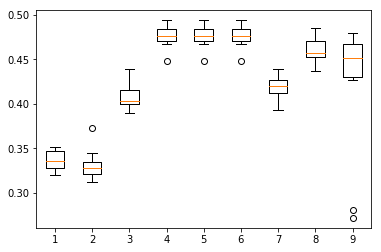

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.boxplot(acc)
#plt.scatter(np.tile(np.array([1,2,3]),(10,1))+0.01*np.random.normal(size=(10,3)),acc,alpha = 0.5,color='r')

Clearly, the best methods are the three SVM, naive_bayes BernoulliNB and KMeans. From now on, the other methods are discarded.

In [13]:
###for RT
r_state = [0,1,2,3,4,5,42,43,44,45]

acc = np.zeros((len(r_state),9))

for i in range(len(r_state)):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y_RT, train_size=0.7, random_state=r_state[i])
    
    #Your code here
    scaler = StandardScaler()
    scaler = scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    
    nn1 = neighbors.KNeighborsClassifier(n_neighbors=1) #1NN
    nn1.fit(X_train_scaled,y_train)
    yhat_nn1 = nn1.predict(X_test_scaled) 

    nn3 = neighbors.KNeighborsClassifier(n_neighbors=3) #3NN
    nn3.fit(X_train_scaled,y_train)
    yhat_nn3 = nn3.predict(X_test_scaled) 
    
    tr = tree.DecisionTreeClassifier() #Decision Tree
    tr.fit(X_train_scaled,y_train)
    yhat_tr = tr.predict(X_test_scaled)
    
    svm10 = svm.SVC(C=10.0,gamma = 1e-5,random_state=42) 
    svm10.fit(X_train_scaled,y_train)
    yhat_svm10 = svm10.predict(X_test_scaled)
    
    svm100 = svm.SVC(C=100.0,gamma = 1e-5,random_state=42)
    svm100.fit(X_train_scaled,y_train)
    yhat_svm100= svm100.predict(X_test_scaled)
    
    svm1000 = svm.SVC(C=1000.0,gamma = 1e-6,random_state=42)
    svm1000.fit(X_train_scaled,y_train)
    yhat_svm1000 = svm1000.predict(X_test_scaled)
    
    GBC = ensemble.GradientBoostingClassifier(random_state=42)
    GBC.fit(X_train_scaled,y_train)
    yhat_GBC = GBC.predict(X_test_scaled)
    
    clf = KMeans(n_clusters=3)
    clf.fit(X_train_scaled,y_train)
    yhat_clf = clf.predict(X_test_scaled)
    
    acc[i,0] = metrics.accuracy_score(y_test,yhat_tr)
    acc[i,1] = metrics.accuracy_score(y_test,yhat_nn1)
    acc[i,2] = metrics.accuracy_score(y_test,yhat_nn3)
    acc[i,3] = metrics.accuracy_score(y_test,yhat_svm10)
    acc[i,4] = metrics.accuracy_score(y_test,yhat_svm100)
    acc[i,5] = metrics.accuracy_score(y_test,yhat_svm1000)
    acc[i,6] = metrics.accuracy_score(y_test,yhat_GBC)
    acc[i,7] = metrics.accuracy_score(y_test,yhat_nb)
    acc[i,8] = metrics.accuracy_score(y_test,yhat_clf)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'whiskers': [<matplotlib.lines.Line2D at 0x10895f860>,
 'caps': [<matplotlib.lines.Line2D at 0x10895c160>,
 'boxes': [<matplotlib.lines.Line2D at 0x10895f710>,
 'medians': [<matplotlib.lines.Line2D at 0x10895c9b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x10895cdd8>,
 'means': []}

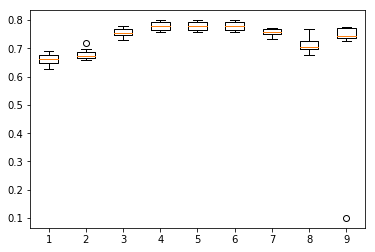

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.boxplot(acc)
#plt.scatter(np.tile(np.array([1,2,3]),(10,1))+0.01*np.random.normal(size=(10,3)),acc,alpha = 0.5,color='r')

Again, the best methods are the three SVM. We can also consider naive_bayes BernoulliNB, GradientBoostingClassifier  and KMeans. From now on, the other methods are discarded.

In [15]:
##Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

###for FC
r_state = [0,1,2,3,4,5,42,43,44,45]

acc = np.zeros((len(r_state),2))

for i in range(len(r_state)):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y_FC, train_size=0.7, random_state=r_state[i])
    
    #Your code here
    scaler = StandardScaler()
    scaler = scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test) 

    gauss = GaussianNB() #Gaussian
    gauss.fit(X_train_scaled,y_train)
    yhat_gauss = gauss.predict(X_test_scaled) 
    
    bern = BernoulliNB() #Bernoulli
    bern.fit(X_train_scaled,y_train)
    yhat_bern = bern.predict(X_test_scaled) 

    
    acc[i,0] = metrics.accuracy_score(y_test,yhat_gauss)
    acc[i,1] = metrics.accuracy_score(y_test,yhat_bern)

{'whiskers': [<matplotlib.lines.Line2D at 0x1112a0e48>,
 'caps': [<matplotlib.lines.Line2D at 0x1112ad748>,
 'boxes': [<matplotlib.lines.Line2D at 0x1112a0cf8>,
 'medians': [<matplotlib.lines.Line2D at 0x1112adf98>,
 'fliers': [<matplotlib.lines.Line2D at 0x1112bb4a8>,
 'means': []}

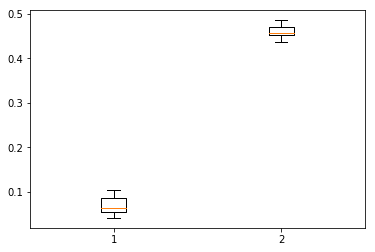

In [16]:
fig = plt.figure()
plt.boxplot(acc) ###Bernoulli for FC

In [17]:
###for RT
r_state = [0,1,2,3,4,5,42,43,44,45]

acc = np.zeros((len(r_state),2))

for i in range(len(r_state)):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y_RT, train_size=0.7, random_state=r_state[i])
    
    #Your code here
    scaler = StandardScaler()
    scaler = scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test) 

    gauss = GaussianNB() #Gaussian
    gauss.fit(X_train_scaled,y_train)
    yhat_gauss = gauss.predict(X_test_scaled) 
    
    bern = BernoulliNB() #Bernoulli
    bern.fit(X_train_scaled,y_train)
    yhat_bern = bern.predict(X_test_scaled) 

    
    acc[i,0] = metrics.accuracy_score(y_test,yhat_gauss)
    acc[i,1] = metrics.accuracy_score(y_test,yhat_bern)

{'whiskers': [<matplotlib.lines.Line2D at 0x11119a7b8>,
 'caps': [<matplotlib.lines.Line2D at 0x1111a30b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x11119a668>,
 'medians': [<matplotlib.lines.Line2D at 0x1111a3908>,
 'fliers': [<matplotlib.lines.Line2D at 0x1111a3d30>,
 'means': []}

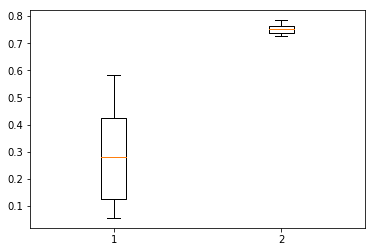

In [18]:
fig = plt.figure()
plt.boxplot(acc) ###Bernoulli for RT

In [19]:
#Decision tree: ja esta fet

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor #no em funciona :(

###for FC
r_state = [0,1,2,3,4,5,42,43,44,45]

acc = np.zeros((len(r_state),4))

for i in range(len(r_state)):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y_FC, train_size=0.7, random_state=r_state[i])
    
    #Your code here
    scaler = StandardScaler()
    scaler = scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test) 

    rfc = RandomForestClassifier() #RFC
    rfc.fit(X_train_scaled,y_train)
    yhat_rfc = rfc.predict(X_test_scaled) 
    
    etc = ExtraTreesClassifier() #ETC
    etc.fit(X_train_scaled,y_train)
    yhat_etc = etc.predict(X_test_scaled)

    clf = AdaBoostClassifier(n_estimators=100) #Ada boosting
    clf.fit(X_train_scaled,y_train)
    yhat_clf = clf.predict(X_test_scaled) 
    
    gbc = GradientBoostingClassifier(n_estimators=100) #gradient boosting class
    gbc.fit(X_train_scaled,y_train)
    yhat_gbc = gbc.predict(X_test_scaled) 
    
    gbr = GradientBoostingRegressor(n_estimators=100) #gradient boosting reg
    gbr.fit(X_train_scaled,y_train)
    yhat_gbr = gbr.predict(X_test_scaled) 
    
    acc[i,0] = metrics.accuracy_score(y_test,yhat_rfc)
    acc[i,1] = metrics.accuracy_score(y_test,yhat_etc)
    acc[i,2] = metrics.accuracy_score(y_test,yhat_clf)
    acc[i,3] = metrics.accuracy_score(y_test,yhat_gbc)
    #acc[i,3] = metrics.accuracy_score(y_test,yhat_gbr)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A c

{'whiskers': [<matplotlib.lines.Line2D at 0x1136ba9e8>,
 'caps': [<matplotlib.lines.Line2D at 0x1136c12e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1136ba898>,
 'medians': [<matplotlib.lines.Line2D at 0x1136c1b38>,
 'fliers': [<matplotlib.lines.Line2D at 0x1136c1f60>,
 'means': []}

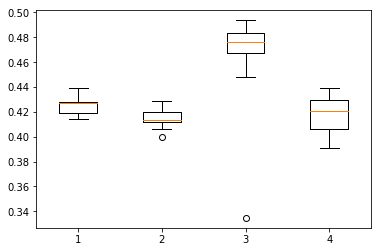

In [21]:
fig = plt.figure()
plt.boxplot(acc)  #Ada boosting

In [ ]:
###for RT
r_state = [0,1,2,3,4,5,42,43,44,45]

acc = np.zeros((len(r_state),4))

for i in range(len(r_state)):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y_RT, train_size=0.7, random_state=r_state[i])
    
    #Your code here
    scaler = StandardScaler()
    scaler = scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test) 

    rfc = RandomForestClassifier() #RFC
    rfc.fit(X_train_scaled,y_train)
    yhat_rfc = rfc.predict(X_test_scaled) 
    
    etc = ExtraTreesClassifier() #ETC
    etc.fit(X_train_scaled,y_train)
    yhat_etc = etc.predict(X_test_scaled)

    clf = AdaBoostClassifier(n_estimators=100) #Ada boosting
    clf.fit(X_train_scaled,y_train)
    yhat_clf = clf.predict(X_test_scaled) 
    
    gbc = GradientBoostingClassifier(n_estimators=100) #gradient boosting class
    gbc.fit(X_train_scaled,y_train)
    yhat_gbc = gbc.predict(X_test_scaled) 
    
    gbr = GradientBoostingRegressor(n_estimators=100) #gradient boosting reg
    gbr.fit(X_train_scaled,y_train)
    yhat_gbr = gbr.predict(X_test_scaled) 
    
    acc[i,0] = metrics.accuracy_score(y_test,yhat_rfc)
    acc[i,1] = metrics.accuracy_score(y_test,yhat_etc)
    acc[i,2] = metrics.accuracy_score(y_test,yhat_clf)
    acc[i,3] = metrics.accuracy_score(y_test,yhat_gbc)
    #acc[i,3] = metrics.accuracy_score(y_test,yhat_gbr)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578

{'whiskers': [<matplotlib.lines.Line2D at 0x111150d68>,
 'caps': [<matplotlib.lines.Line2D at 0x1111f5668>,
 'boxes': [<matplotlib.lines.Line2D at 0x111150c18>,
 'medians': [<matplotlib.lines.Line2D at 0x1111f5eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1111e4320>,
 'means': []}

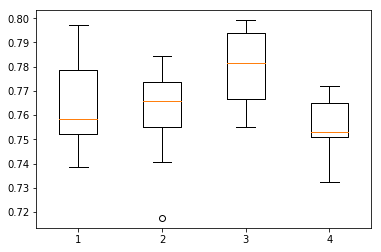

In [ ]:
fig = plt.figure()
plt.boxplot(acc)  #Ada boosting

In [ ]:
#Neural networks

from sklearn.neural_network import MLPClassifier

###for FC
r_state = [0,1,2,3,4,5,42,43,44,45]

acc = np.zeros((len(r_state),1))

for i in range(len(r_state)):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y_FC, train_size=0.7, random_state=r_state[i])
    
    #Your code here
    scaler = StandardScaler()
    scaler = scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test) 

    mlp = MLPClassifier() #MLP
    mlp.fit(X_train_scaled,y_train)
    yhat_mlp = mlp.predict(X_test_scaled) 
    
    acc[i,0] = metrics.accuracy_score(y_test,yhat_mlp)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'whiskers': [<matplotlib.lines.Line2D at 0x10c032400>,
 'caps': [<matplotlib.lines.Line2D at 0x10c032cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x10c0322b0>],
 'medians': [<matplotlib.lines.Line2D at 0x10c03d550>],
 'fliers': [<matplotlib.lines.Line2D at 0x10c03d978>],
 'means': []}

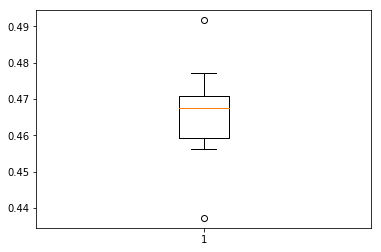

In [ ]:
fig = plt.figure()
plt.boxplot(acc) 

In [ ]:

from sklearn.neural_network import MLPClassifier

###for RT
r_state = [0,1,2,3,4,5,42,43,44,45]

acc = np.zeros((len(r_state),1))

for i in range(len(r_state)):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y_FC, train_size=0.7, random_state=r_state[i])
    
    #Your code here
    scaler = StandardScaler()
    scaler = scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test) 

    mlp = MLPClassifier() #MLP
    mlp.fit(X_train_scaled,y_train)
    yhat_mlp = mlp.predict(X_test_scaled) 
    
    acc[i,0] = metrics.accuracy_score(y_test,yhat_mlp)

In [ ]:
#Generalized linear models

In [ ]:
###for FC
r_state = [0,1,2,3,4,5,42,43,44,45]

acc = np.zeros((len(r_state),1))

for i in range(len(r_state)):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y_FC, train_size=0.7, random_state=r_state[i])    
    
    nn11 = neighbors.KNeighborsClassifier(n_neighbors=11) #11NN
    nn11.fit(X_train_scaled,y_train)
    yhat_nn11 = nn11.predict(X_test_scaled)
    
    acc[i,0] = metrics.accuracy_score(y_test,yhat_nn11)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


{'whiskers': [<matplotlib.lines.Line2D at 0x113590550>,
 'caps': [<matplotlib.lines.Line2D at 0x113590e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x113590400>],
 'medians': [<matplotlib.lines.Line2D at 0x1135b55f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1135b5e48>],
 'means': []}

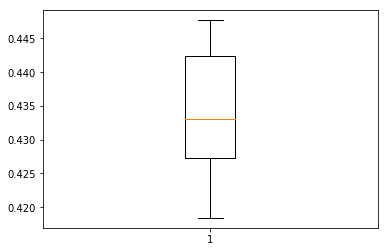

In [ ]:
fig = plt.figure()
plt.boxplot(acc) 

In [ ]:
#For FC
r_state = [0,1,2,3,4,5,42,43,44,45]

acc = np.zeros((len(r_state),1))

for i in range(len(r_state)):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y_RT, train_size=0.7, random_state=r_state[i])    
    
    nn11 = neighbors.KNeighborsClassifier(n_neighbors=1113) #11NN
    nn11.fit(X_train_scaled,y_train)
    yhat_nn11 = nn11.predict(X_test_scaled)
    
    acc[i,0] = metrics.accuracy_score(y_test,yhat_nn11)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


{'whiskers': [<matplotlib.lines.Line2D at 0x113507ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x11351a7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x113507da0>],
 'medians': [<matplotlib.lines.Line2D at 0x11352d080>],
 'fliers': [<matplotlib.lines.Line2D at 0x11352d4a8>],
 'means': []}

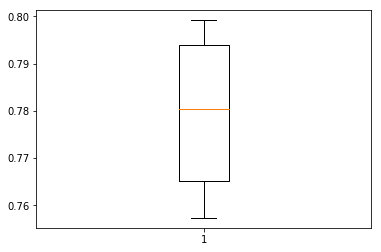

In [ ]:
fig = plt.figure()
plt.boxplot(acc)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'whiskers': [<matplotlib.lines.Line2D at 0x108989dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x1089c36d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x108989c88>,
 'medians': [<matplotlib.lines.Line2D at 0x1089c3f28>,
 'fliers': [<matplotlib.lines.Line2D at 0x1089ae390>,
 'means': []}

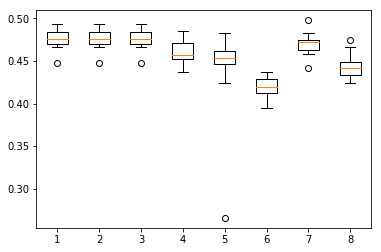

In [ ]:
#Best methods until now
#For FC
r_state = [0,1,2,3,4,5,42,43,44,45]

acc = np.zeros((len(r_state),8))

for i in range(len(r_state)):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y_FC, train_size=0.7, random_state=r_state[i])
    
    scaler = StandardScaler()
    scaler = scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    svm10 = svm.SVC(C=10.0,gamma = 1e-5,random_state=42) 
    svm10.fit(X_train_scaled,y_train)
    yhat_svm10 = svm10.predict(X_test_scaled)
    
    svm100 = svm.SVC(C=100.0,gamma = 1e-5,random_state=42)
    svm100.fit(X_train_scaled,y_train)
    yhat_svm100= svm100.predict(X_test_scaled)
    
    svm1000 = svm.SVC(C=1000.0,gamma = 1e-6,random_state=42)
    svm1000.fit(X_train_scaled,y_train)
    yhat_svm1000 = svm1000.predict(X_test_scaled)
    
    nb = BernoulliNB()
    nb.fit(X_train_scaled,y_train)
    yhat_nb = nb.predict(X_test_scaled)
    
    clf = KMeans(n_clusters=3)
    clf.fit(X_train_scaled,y_train)
    yhat_clf = clf.predict(X_test_scaled)
    
    gbc = GradientBoostingClassifier(n_estimators=100) #gradient boosting class
    gbc.fit(X_train_scaled,y_train)
    yhat_gbc = gbc.predict(X_test_scaled) 
    
    mlp = MLPClassifier() #MLP
    mlp.fit(X_train_scaled,y_train)
    yhat_mlp = mlp.predict(X_test_scaled) 
    
    nn11 = neighbors.KNeighborsClassifier(n_neighbors=11) #11NN
    nn11.fit(X_train_scaled,y_train)
    yhat_nn11 = nn11.predict(X_test_scaled)
    
    acc[i,0] = metrics.accuracy_score(y_test,yhat_svm10)
    acc[i,1] = metrics.accuracy_score(y_test,yhat_svm100)
    acc[i,2] = metrics.accuracy_score(y_test,yhat_svm1000)
    acc[i,3] = metrics.accuracy_score(y_test,yhat_nb)
    acc[i,4] = metrics.accuracy_score(y_test,yhat_clf)
    acc[i,5] = metrics.accuracy_score(y_test,yhat_gbc)
    acc[i,6] = metrics.accuracy_score(y_test,yhat_mlp)
    acc[i,7] = metrics.accuracy_score(y_test,yhat_nn11)
    
fig = plt.figure()
plt.boxplot(acc)

In [ ]:
from __future__ import print_function

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
#digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
numl = len(X)
n_samples = numl
#X = digits.images.reshape((n_samples, -1))
#y = digits.target
y = Y_FC

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision



/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y 

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/l

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/l

In [ ]:
from sklearn import svm, grid_search
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    #gammas = [0.001, 0.01, 0.1, 1]
    gammas = [0.000001, 0.00001, 0.0001, 0.001]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

param_svm_FC = svc_param_selection(X, Y_FC, 5)
print("FC parameters:",param_svm_FC)
param_svm_RT = svc_param_selection(X, Y_RT, 5)
print("RT parameters:",param_svm_RT)

In [ ]:
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
r_state = [0,1,2,3,4,5,42,43,44,45]
acc = np.zeros((len(r_state),2))

for i in range(len(r_state)):
    X_train_FC, X_test_FC, y_train_FC, y_test_FC = model_selection.train_test_split(X, Y_FC, train_size=0.7, random_state=r_state[i])
    X_train_RT, X_test_RT, y_train_RT, y_test_RT = model_selection.train_test_split(X, Y_RT, train_size=0.7, random_state=r_state[i])
    
    scaler = StandardScaler()
    scaler = scaler.fit(X_train_FC)
    X_train_FC_scaled = scaler.transform(X_train_FC)
    X_test_FC_scaled = scaler.transform(X_test_FC)
    scaler = scaler.fit(X_train_RT)
    X_train_RT_scaled = scaler.transform(X_train_RT)
    X_test_RT_scaled = scaler.transform(X_test_RT)
    
    
    svm_FC = svm.SVC(C=10.0,gamma = 0.0001,random_state=42) 
    svm_FC.fit(X_train_FC_scaled,y_train_FC)
    yhat_FC = svm_FC.predict(X_test_FC_scaled)
    
    svm_RT = svm.SVC(C=0.001,gamma = 1e-6,random_state=42) 
    svm_RT.fit(X_train_RT_scaled,y_train_RT)
    yhat_RT = svm_RT.predict(X_test_RT_scaled)
    
    acc[i,0] = metrics.accuracy_score(y_test_FC,yhat_FC)
    acc[i,1] = metrics.accuracy_score(y_test_RT,yhat_RT)

print("mean accuracy FC:",np.mean(acc[:,0]))
print("mean accuracy RT:",np.mean(acc[:,1]))


In [ ]:
##we try using the mean as yhat
X.head()

In [ ]:
Y_FC.head()

In [ ]:
from sklearn.metrics import r2_score

yhat_FC = X['FC_l10']
#yhat_RT = X['RT_l10']

r2_FC = r2_score(Y_FC, yhat_FC)
print(r2_FC)

In [ ]:
from sklearn import linear_model
from sklearn import model_selection
import matplotlib.pyplot as plt
r_state = [0,1,2,3,4,5,42,43,44,45]
acc = np.zeros((len(r_state),1))

for i in range(len(r_state)):
    X_train_FC, X_test_FC, y_train_FC, y_test_FC = model_selection.train_test_split(X, Y_FC, train_size=0.7, random_state=r_state[i])

    reg = linear_model.LinearRegression()
    reg.fit(X_train_FC,y_train_FC)
    #LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
     #                normalize=False)
    yhat_FC = reg.predict(X_test_FC)
    
    acc[i,0] = r2_score(y_test_FC,yhat_FC)

fig = plt.figure()
plt.boxplot(acc)

In [ ]:
from sklearn.metrics import r2_score

yhat_RT = X['RT_l10']
#yhat_RT = X['RT_l10']

r2_RT = r2_score(Y_RT, yhat_RT)
print(r2_RT)

In [7]:
X.shape

(1592, 9)

In [17]:
import math

def f_poisson(k,lamb):
    return (lamb**k * np.e**(-lamb))/math.factorial(k)

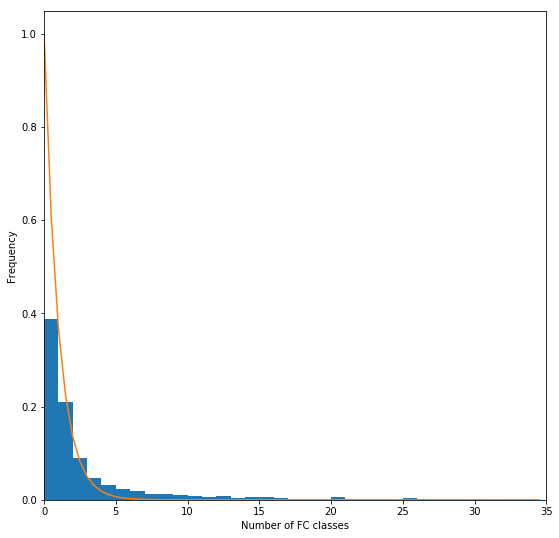

In [34]:
# FC Histogram with poisson distribution superposed
x_plot = np.arange(0,35,0.5)

plt.figure()
plt.hist(x=Y_FC['FC'],density=1, bins=int(np.max(Y_FC['FC']))) 
plt.plot(x_plot,f_poisson(0,x_plot))
#plt.plot(x_plot,f_poisson(1,x_plot))
plt.xlabel('Number of FC classes')
plt.ylabel('Frequency')
plt.xlim(0, 35)
fig = plt.gcf()
fig.set_size_inches((9,9))

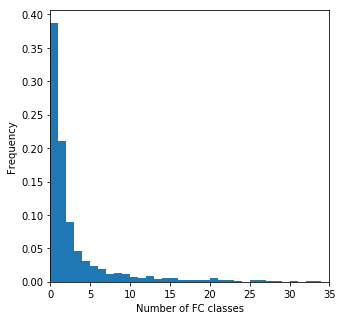

In [4]:
# FC Histogram with poisson distribution superposed
x_plot = np.arange(0,35,0.5)

plt.figure()
plt.hist(x=Y_FC['FC'],density=1, bins=int(np.max(Y_FC['FC']))) 
#plt.plot(x_plot,f_poisson(0,x_plot))
#plt.plot(x_plot,f_poisson(1,x_plot))
plt.xlabel('Number of FC classes')
plt.ylabel('Frequency')
plt.xlim(0, 35)
fig = plt.gcf()
fig.set_size_inches((5,5))

In [46]:
file = pd.read_csv('clean_newauthors.csv')
file.head()

Unnamed: 0  RT_l10      sd_RT  FC_l10      sd_FC    FC    RT  \
0           0     2.4   3.929377    15.5  32.022648   0.0   0.0   
1           1     0.2   0.600000     0.8   0.979796   1.0   0.0   
2           2    17.9  13.626812    37.2  40.931162  21.0  10.0   
3           3     0.4   0.489898     1.7   3.796051   0.0   0.0   
4           4     2.3   5.216321     3.4   6.545227   0.0   0.0   

   followers_count  friends_count  listed_count  favourites_count  \
0          19645.0          949.0         662.0           12334.0   
1           4221.0          281.0         340.0             587.0   
2        1133925.0            1.0        9745.0              16.0   
3           5386.0         3861.0         304.0           15325.0   
4           1072.0          433.0         101.0             899.0   

   statuses_count  
0         55829.0  
1         13650.0  
2         65228.0  
3         85493.0  
4         19893.0

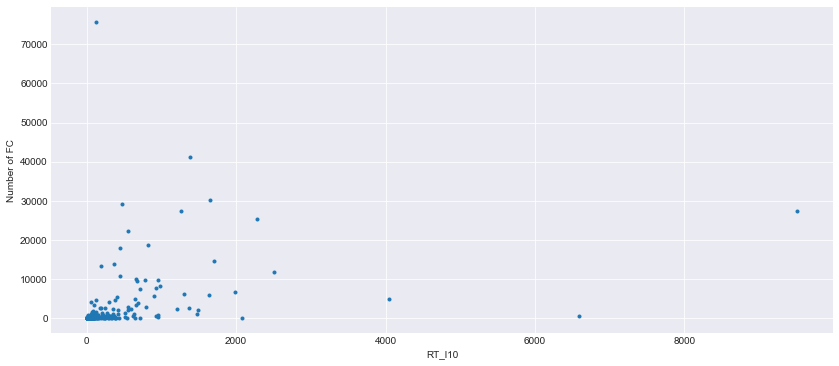

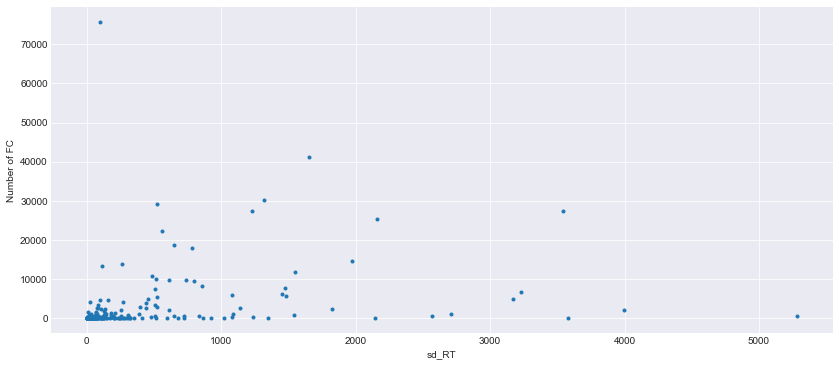

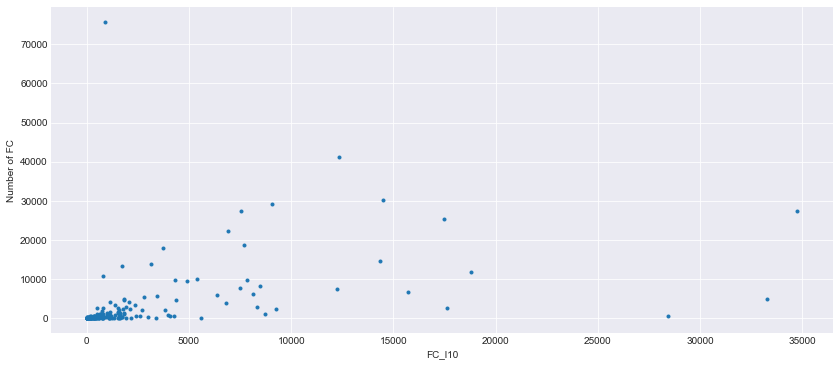

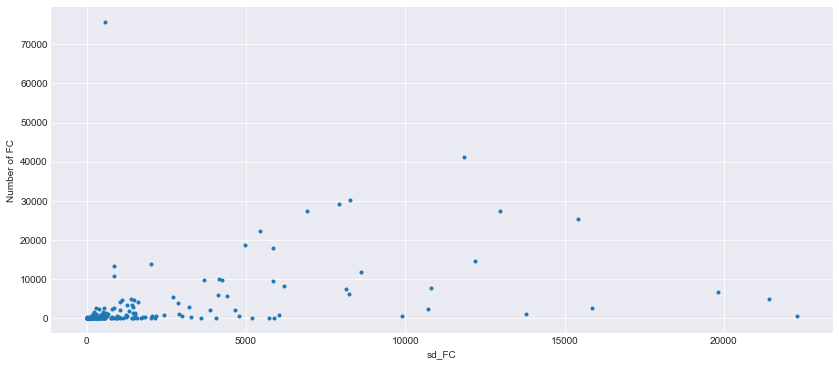

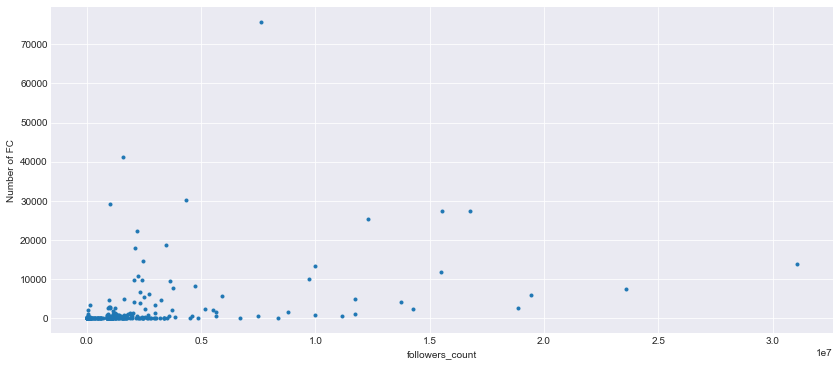

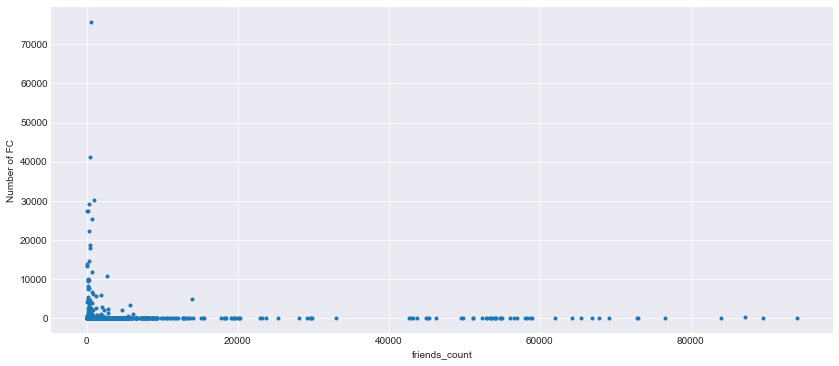

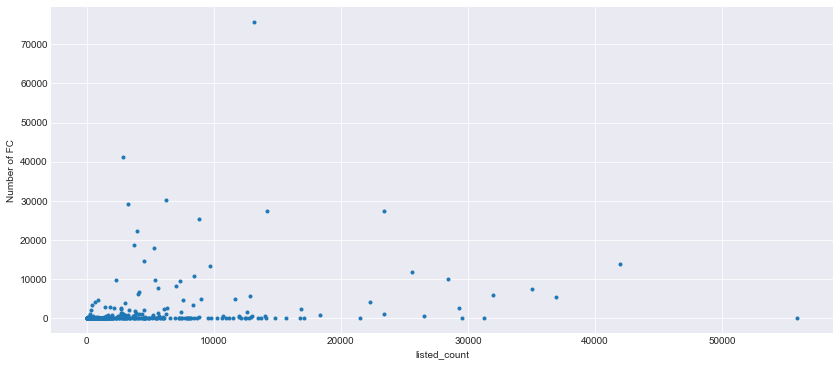

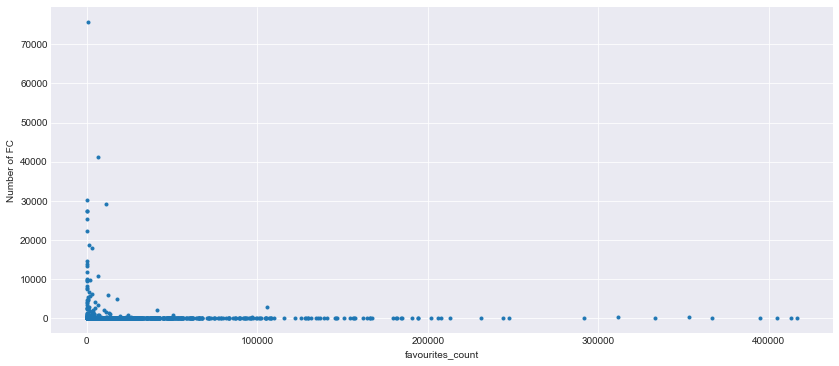

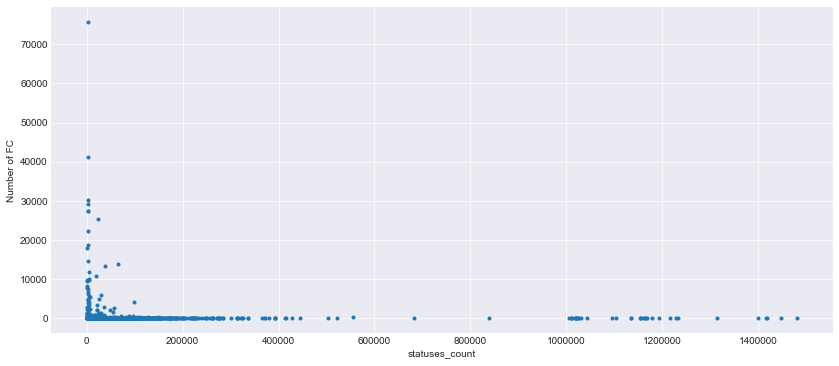

In [56]:
var_x =['RT_l10','sd_RT','FC_l10','sd_FC','followers_count','friends_count','listed_count','favourites_count','statuses_count']
for x in var_x:
    plt.figure()
    plt.plot(X[x],Y_FC,'.')
    plt.xlabel(x)
    plt.ylabel('Number of FC')

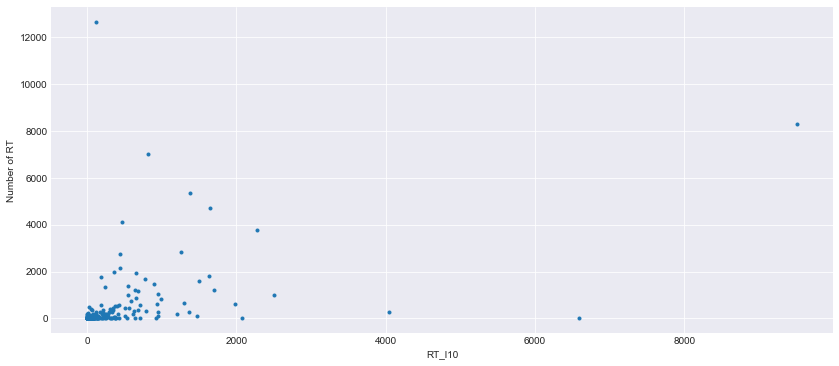

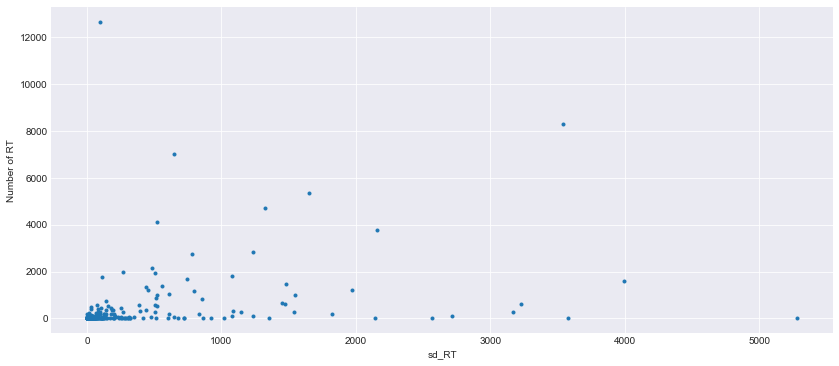

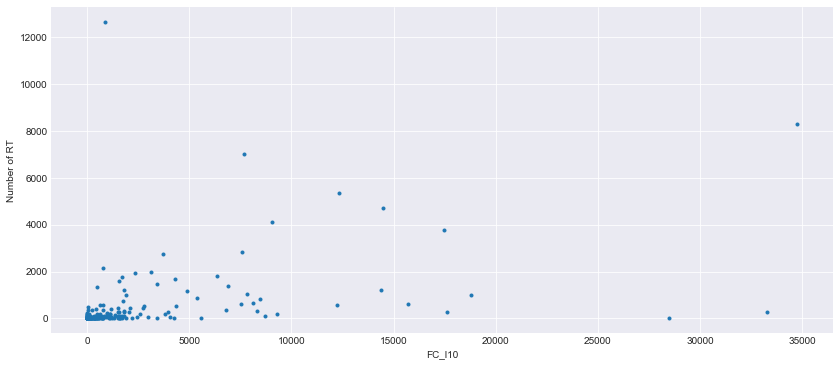

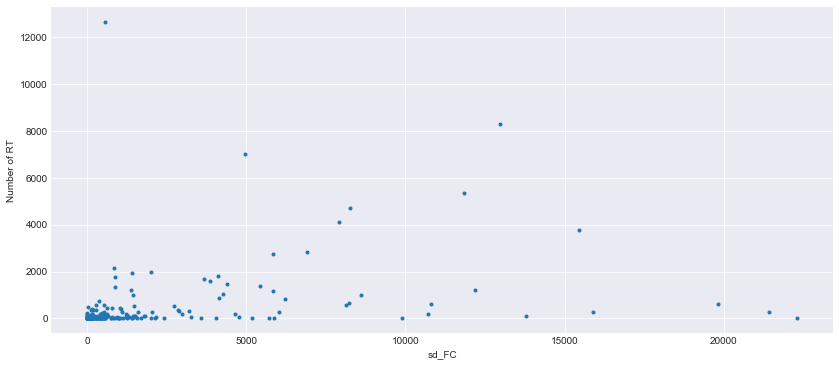

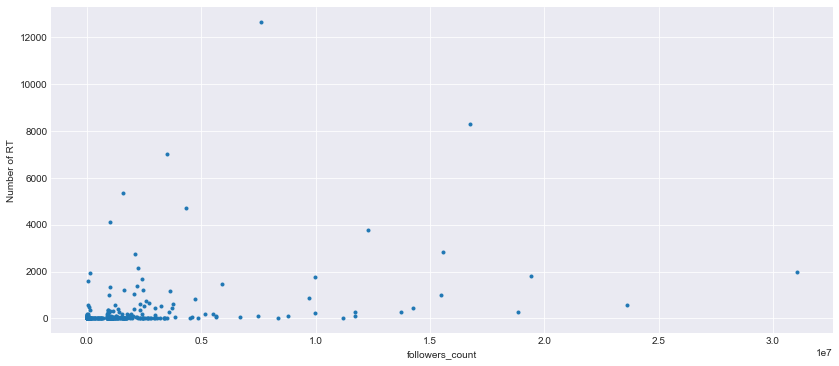

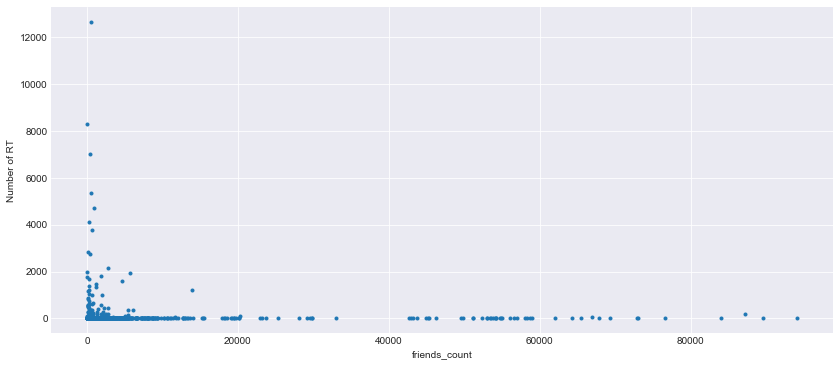

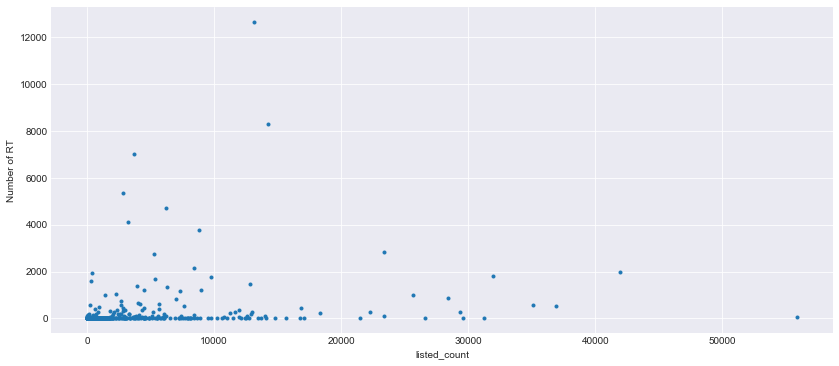

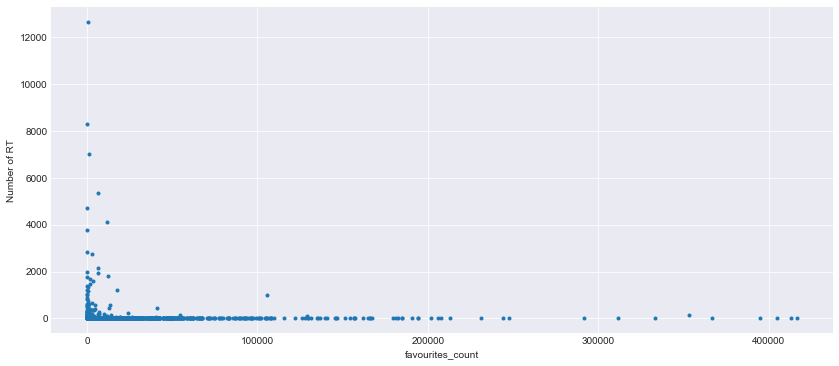

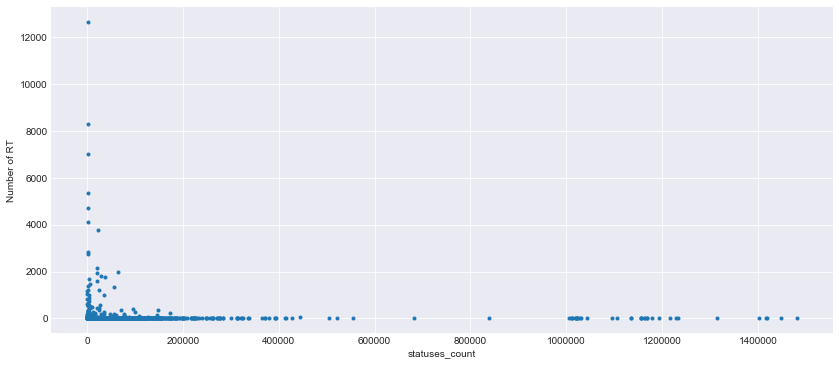

In [57]:
var_x =['RT_l10','sd_RT','FC_l10','sd_FC','followers_count','friends_count','listed_count','favourites_count','statuses_count']
for x in var_x:
    plt.figure()
    plt.plot(X[x],Y_RT,'.')
    plt.xlabel(x)
    plt.ylabel('Number of RT')

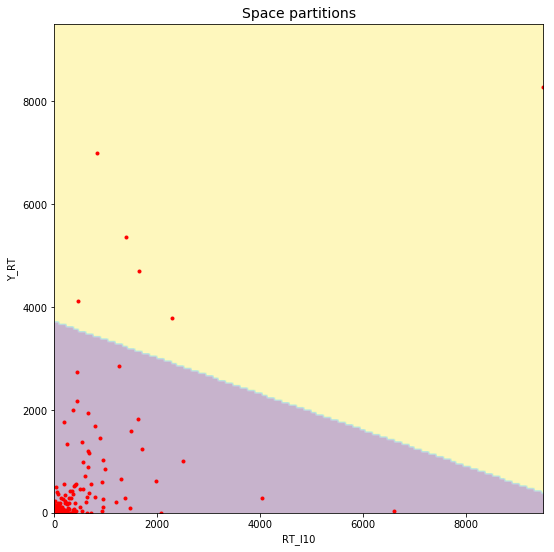

In [26]:
from sklearn import cluster

K=2
clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(np.c_[np.array(X['RT_l10']), np.array(Y_RT)])

plt.plot(np.array(X['RT_l10']),np.array(Y_RT),'.r')
plt.xlabel("RT_l10")
plt.ylabel("Y_RT")
x = np.linspace(min(np.array(X['RT_l10'])),max(np.array(X['RT_l10'])),200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]

Z=clf.predict(data)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', 
           extent=(min(np.array(X['RT_l10'])),max(np.array(X['RT_l10'])),
                   min(np.array(X['RT_l10'])),max(np.array(X['RT_l10']))),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
fig = plt.gcf()
fig.set_size_inches((9,9))

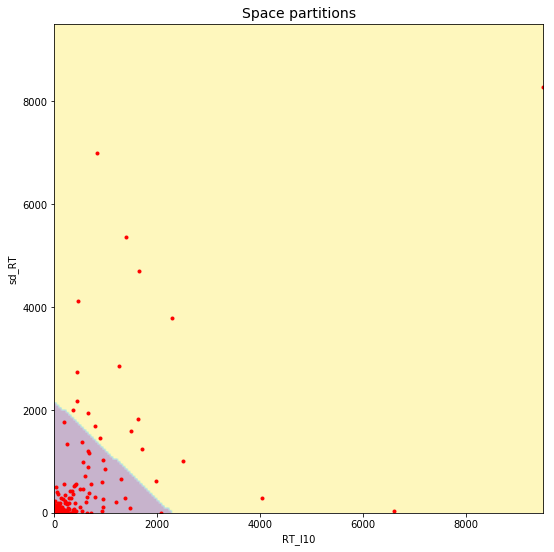

In [48]:
from sklearn import cluster

K=2
clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(np.c_[np.array(X['RT_l10']), np.array(X['sd_RT'])])

plt.plot(np.array(X['RT_l10']),np.array(Y_RT),'.r')
plt.xlabel("RT_l10")
plt.ylabel('sd_RT')
x = np.linspace(min(np.array(X['RT_l10'])),max(np.array(X['RT_l10'])),200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]

Z=clf.predict(data)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', 
           extent=(min(np.array(X['RT_l10'])),max(np.array(X['RT_l10'])),
                   min(np.array(X['RT_l10'])),max(np.array(X['RT_l10']))),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
fig = plt.gcf()
fig.set_size_inches((9,9))

$x_{sd\_RT} < - x_{RT\_l10} + 2000 \Longrightarrow $ Model 0 

$x_{sd\_RT} > - x_{RT\_l10} + 2000 \Longrightarrow$ Model pro

Falta ser més precís

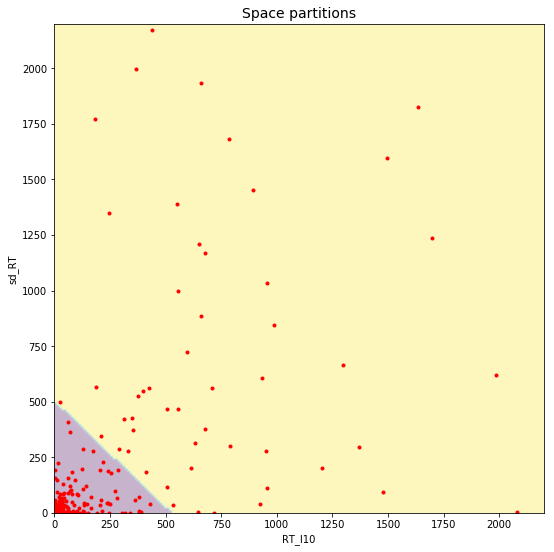

In [62]:
from sklearn import cluster

K=2
clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(np.c_[np.array(X['RT_l10']), np.array(X['sd_RT'])])

plt.plot(np.array(X['RT_l10']),np.array(Y_RT),'.r')
plt.xlabel("RT_l10")
plt.ylabel('sd_RT')
x = np.linspace(min(np.array(X['RT_l10'])),max(np.array(X['RT_l10'])),200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]

Z=clf.predict(data)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', 
           extent=(0,2200,
                   0,2200),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
fig = plt.gcf()
fig.set_size_inches((9,9))

[[2.4 0. ]
 [0.2 0. ]]


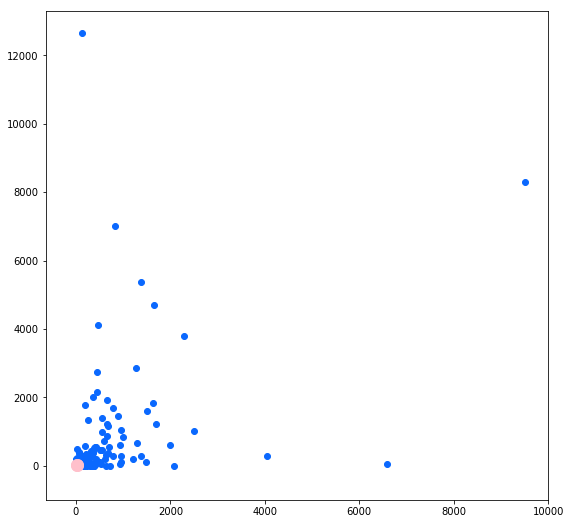

In [42]:
from scipy.spatial.distance import cdist
K = 2
X = np.c_[np.array(X['RT_l10']), np.array(Y_RT)]

C=X[0:K,:].copy()
print(C)
def soft_kmeans_iter(X,C,beta):
    #Compute membership for next iteration
    d = cdist(X, C, 'seuclidean')
    r = np.exp(-beta*d)
    r = r/(np.dot(np.sum(r, axis=1)[:,np.newaxis],np.ones((1,K)))+1e-16)
    #Update centroids
    for i in range(K):
        for dim in range(C.shape[1]):
            C[i,dim] = np.sum(X[:,dim]*r[:,i])/(np.sum(r[:,i])+1e-16)
    return C,r

        
beta=10.
for iter in range(100):
    C,r = soft_kmeans_iter(X,C,beta)
y_pred = np.argmax(r,axis=1)
for label in np.unique(y_pred):
    plt.scatter(X[(y_pred==label).ravel(),0],X[(y_pred==label).ravel(),1],color=[np.random.rand(),np.random.rand(),np.random.rand()])

    
plt.scatter(C[:,0],C[:,1],s=max(1200/beta,120), 
           facecolors='pink', 
           linewidths=2,
           zorder=10)
fig = plt.gcf()
fig.set_size_inches((9,9))

In [63]:
reset -f

In [88]:
from sklearn.cluster import KMeans
import numpy as np
K = 1
y = np.array(Y_RT)

km = KMeans(n_clusters=1)
km.fit(y.reshape(-1,1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

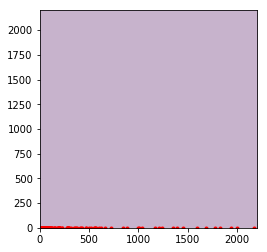

In [90]:
from sklearn import cluster
import numpy as np
import matplotlib.pyplot as plt

K=1

val = 0. # this is the value where you want the data to appear on the y-axis.
ar = y # just as an example array
plt.plot(ar, np.zeros_like(ar) + val, '.r')

data = np.linspace(min(y),max(y),200)
z=km.predict(data.reshape(-1,1))


plt.imshow(z.reshape(-1,1), interpolation='bilinear', origin='lower', 
           extent=(0,2200,
                   0,2200),alpha=0.3, vmin=0, vmax=K-1)


In [91]:
print(z)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
x = np.linspace(min(np.array(X['RT_l10'])),max(np.array(X['RT_l10'])),200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]

Z=clf.predict(data)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', 
           extent=(0,2200,
                   0,2200),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
fig = plt.gcf()
fig.set_size_inches((9,9))